<h2>1 Preparar los datos para el análisis</h2>

- Cambia el nombre de las columnas de manera que sea conveniente para ti.
- Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
- Agrega una columna de fecha y hora y una columna separada para las fechas.

<h2>2 Estudiar y comprobar los datos</h2>

- ¿Cuántos eventos hay en los registros?
- ¿Cuántos usuarios hay en los registros?
- ¿Cuál es el promedio de eventos por usuario?
- ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. - ¿Qué periodo representan realmente los datos?
- ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
- Asegúrate de tener usuarios de los tres grupos experimentales.
<h2>3 Estudiar el embudo de eventos</h2>
<h2>4 Estudiar los resultados del experimento</h2>

<h2>Cargar Librerías</h2>

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
#from scipy import stats as st
from matplotlib import pyplot as plt
from decimal import *
import seaborn as sns
import datetime as dt
import scipy.stats as stats

<H2>Paso 1. Abrir el archivo de datos y leer la información general</H2>

In [2]:
df_logs=  pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

df_logs.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 244126 entries, 0 to 244125
,Data columns (total 4 columns):
, #   Column          Non-Null Count   Dtype 
,---  ------          --------------   ----- 
, 0   EventName       244126 non-null  object
, 1   DeviceIDHash    244126 non-null  int64 
, 2   EventTimestamp  244126 non-null  int64 
, 3   ExpId           244126 non-null  int64 
,dtypes: int64(3), object(1)
,memory usage: 7.5+ MB


<H2>Paso 2. Preparar los datos para el análisis</H2>

* Cambia el nombre de las columnas de manera que sea conveniente para ti.

De momento el nombre de las columnas, me parece bien

* Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.

In [3]:
#Convertir a datetime la columna: EventTimestamp
df_logs['EventTimestamp'] = df_logs['EventTimestamp'].astype(str)
df_logs['EventTimestamp']=pd.to_datetime(df_logs['EventTimestamp'], unit='s')
print(df_logs.head())
df_logs.info()

                 EventName         DeviceIDHash      EventTimestamp  ExpId
,0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246
,1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246
,2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248
,3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248
,4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 244126 entries, 0 to 244125
,Data columns (total 4 columns):
, #   Column          Non-Null Count   Dtype         
,---  ------          --------------   -----         
, 0   EventName       244126 non-null  object        
, 1   DeviceIDHash    244126 non-null  int64         
, 2   EventTimestamp  244126 non-null  datetime64[ns]
, 3   ExpId           244126 non-null  int64         
,dtypes: datetime64[ns](1), int64(2), object(1)
,memory usage: 7.5+ MB


In [4]:
#Buscar valores nulos:
val_ausentes = df_logs.isna().sum()
print(val_ausentes)

EventName         0
,DeviceIDHash      0
,EventTimestamp    0
,ExpId             0
,dtype: int64


* Agrega una columna de fecha y hora y una columna separada para las fechas.

In [5]:
# Crea nuevas columnas para la fecha y la hora
df_logs['fecha'] = df_logs['EventTimestamp'].dt.date
df_logs['hora'] = df_logs['EventTimestamp'].dt.time

print(df_logs.head())

                 EventName         DeviceIDHash      EventTimestamp  ExpId  \
,0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
,1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
,2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
,3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
,4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   
,
,        fecha      hora  
,0  2019-07-25  04:43:36  
,1  2019-07-25  11:11:42  
,2  2019-07-25  11:28:47  
,3  2019-07-25  11:28:47  
,4  2019-07-25  11:48:42  


<H2>Paso 3. Estudiar y comprobar los datos</H2>

* ¿Cuántos eventos hay en los registros?

In [6]:
events_total_dis = (
    df_logs.groupby('EventName')
    .agg({'EventName': 'nunique'})
    .count()
)

events_total = df_logs['EventName'].count()
print("Numero de eventos diferentes:",int(events_total_dis))
print("Total de eventos:",events_total)

Numero de eventos diferentes: 5
,Total de eventos: 244126


* ¿Cuántos usuarios hay en los registros?

In [7]:
user_total = (
    df_logs.groupby('DeviceIDHash')
    .agg({'DeviceIDHash': 'nunique'})
    .count()
)

print("Numero de usuarion:",int(events_total))

Numero de usuarion: 244126


* ¿Cuál es el promedio de eventos por usuario?

In [8]:
# Agrupar por evento y contar usuarios únicos
evento_por_usuario = df_logs.groupby('DeviceIDHash')['EventName'].nunique()
# Calcular el promedio de usuarios por evento
prom_evento_usuario = evento_por_usuario.mean()
print("Promedio evento por usuario:",int(prom_evento_usuario))

Promedio evento por usuario: 2


* ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [9]:
max_fecha=df_logs['fecha'].max()
min_fecha=df_logs['fecha'].min()
print("Fecha minima:",min_fecha)
print("Fecha maxima:",max_fecha)


Fecha minima: 2019-07-25
,Fecha maxima: 2019-08-07


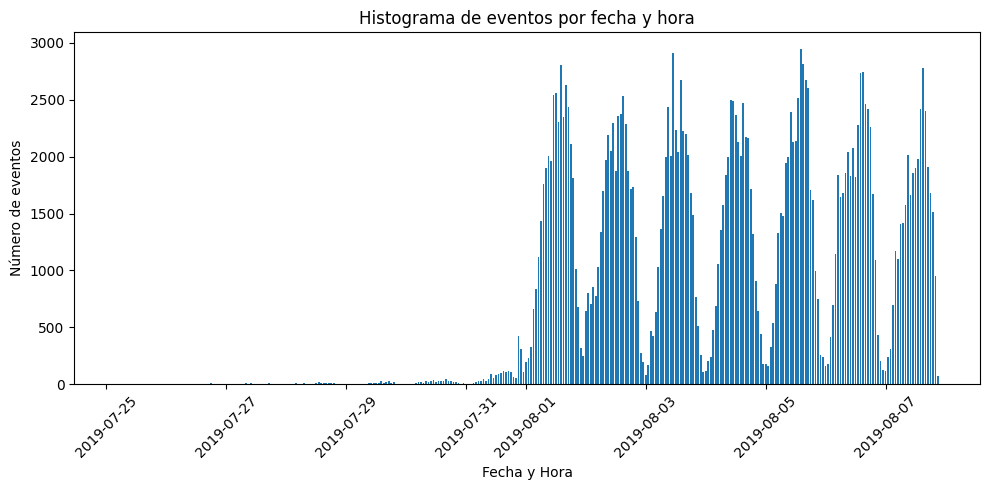

In [10]:


df_logs['hora_redondeada'] = df_logs['EventTimestamp'].dt.floor('H')
fecha_hora = df_logs.groupby('hora_redondeada').size().reset_index(name='cuenta')


plt.figure(figsize=(10, 5))
plt.bar(fecha_hora['hora_redondeada'], fecha_hora['cuenta'], width=0.03)
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de eventos')
plt.title('Histograma de eventos por fecha y hora')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




No se alcanza a pareciar todos los datos no podemos asegurar  que esten completos. pero es evidente que al inicio del periodo hay menos eventos.

In [11]:

df_logs = df_logs.sort_values('fecha')
df_logs['diff'] = df_logs['fecha'].diff()


saltos = df_logs[df_logs['diff'] >= pd.Timedelta(days=1)]
print(saltos)

                      EventName         DeviceIDHash      EventTimestamp  \
,26           OffersScreenAppear  2029140728621466572 2019-07-26 17:06:36   
,69             MainScreenAppear  1034477367567772443 2019-07-27 12:55:31   
,172            MainScreenAppear  4834311234148066953 2019-07-28 16:53:25   
,318            MainScreenAppear  5496023611025522824 2019-07-29 16:52:09   
,662            CartScreenAppear  1642029086328604249 2019-07-30 16:11:25   
,2148         OffersScreenAppear  8545460827685988062 2019-07-31 21:21:36   
,26978        OffersScreenAppear  4933689529142781210 2019-08-01 15:42:19   
,62794   PaymentScreenSuccessful  6853642322140815386 2019-08-02 15:17:16   
,96880          CartScreenAppear  7235689600187012281 2019-08-03 15:02:15   
,130042  PaymentScreenSuccessful  4713748699910253089 2019-08-04 15:26:23   
,165120       OffersScreenAppear  6329580675531008071 2019-08-05 15:32:54   
,201040         CartScreenAppear  6264364458061685488 2019-08-06 15:34:59   


In [12]:

fecha_eventos = df_logs.pivot_table(
    index='fecha', 
    columns='EventName', 
    values='DeviceIDHash',
    aggfunc='count')


print(fecha_eventos)

EventName   CartScreenAppear  MainScreenAppear  OffersScreenAppear  \
,fecha                                                                
,2019-07-25               2.0               4.0                 1.0   
,2019-07-26               6.0              16.0                 4.0   
,2019-07-27               4.0              39.0                 9.0   
,2019-07-28              24.0              53.0                16.0   
,2019-07-29              23.0             132.0                20.0   
,2019-07-30              49.0             280.0                51.0   
,2019-07-31             258.0            1250.0               374.0   
,2019-08-01            6231.0           17957.0              6991.0   
,2019-08-02            6529.0           16812.0              6926.0   
,2019-08-03            6381.0           14845.0              6797.0   
,2019-08-04            6162.0           15216.0              6490.0   
,2019-08-05            6257.0           18020.0              6672.0   
,2019-0

podemos empesar a tomal los datos a partir del dia: 2019-07-31 al 2019-08-07


* ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [13]:
logs_filter=df_logs[df_logs['fecha'] >=pd.to_datetime('2019-07-31')]
eventos_filter = logs_filter['EventName'].count()
print("Numero de eventos perdidos:",events_total-eventos_filter)

Numero de eventos perdidos: 797


* Asegúrate de tener usuarios de los tres grupos experimentales.

In [14]:
usuarios_exp = df_logs.pivot_table(
    index='fecha', 
    columns='ExpId', 
    values='DeviceIDHash',
    aggfunc='count')
print(usuarios_exp)

ExpId         246    247    248
,fecha                          
,2019-07-25      4      1      4
,2019-07-26     14      8      9
,2019-07-27     24     23      8
,2019-07-28     33     36     36
,2019-07-29     55     58     71
,2019-07-30    129    138    146
,2019-07-31    620    664    747
,2019-08-01  11581  12336  12312
,2019-08-02  10960  11015  13631
,2019-08-03  10599  11040  11712
,2019-08-04  11533   9949  11551
,2019-08-05  12381  10971  12761
,2019-08-06  11740  11731  12351
,2019-08-07  10631  10105  10408


En el periodo elegido del 2019-07-31 al 2019-08-07 contamos con usuarios de los tres grupos.

<h2>Paso 4. Estudiar el embudo de eventos</h2>

 * Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [15]:
events_count = logs_filter.groupby('EventName').agg({'DeviceIDHash': 'count'})
print(events_count.sort_values('DeviceIDHash', ascending=False))

                         DeviceIDHash
,EventName                            
,MainScreenAppear               118681
,OffersScreenAppear              46724
,CartScreenAppear                42623
,PaymentScreenSuccessful         34253
,Tutorial                         1048


* Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [16]:

 events_user = logs_filter.groupby('EventName').agg({'DeviceIDHash': 'nunique'})
print(events_user.sort_values(by = 'DeviceIDHash', ascending=False))


                         DeviceIDHash
,EventName                            
,MainScreenAppear                 7429
,OffersScreenAppear               4606
,CartScreenAppear                 3742
,PaymentScreenSuccessful          3542
,Tutorial                          845


* ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [17]:
users = logs_filter.pivot_table(
    index='DeviceIDHash', 
    columns='EventName', 
    values='EventTimestamp',
    aggfunc='min')

print(users.head(19))

EventName            CartScreenAppear    MainScreenAppear  OffersScreenAppear  \
,DeviceIDHash                                                                    
,6888746892508752                  NaT 2019-08-06 14:06:34                 NaT   
,6909561520679493  2019-08-06 18:52:58 2019-08-06 18:52:54 2019-08-06 18:53:04   
,6922444491712477  2019-08-04 14:19:40 2019-08-04 14:19:33 2019-08-04 14:19:46   
,7435777799948366                  NaT 2019-08-05 08:06:34                 NaT   
,7702139951469979  2019-08-02 14:28:45 2019-08-01 04:29:54 2019-08-01 04:29:56   
,8486814028069281  2019-08-05 04:49:18 2019-08-05 04:52:40 2019-08-05 04:49:13   
,8740973466195562                  NaT 2019-08-02 09:16:48 2019-08-02 09:43:59   
,9841258664663090  2019-08-03 10:52:15 2019-08-03 10:47:59 2019-08-03 10:49:42   
,12692216027168046                 NaT 2019-08-02 16:28:49 2019-08-05 04:06:02   
,15708180189885246 2019-08-01 11:06:19 2019-08-01 16:08:23 2019-08-01 05:38:55   
,1865881819781038

<P>Creo que los eventes ocurri asi: </P>
<P>1. Tutorial->MainScreenAppear->OffersScreenAppear->CartScreenAppear->PaymentScreenSuccessful          </P>
<P> De acuerdo a dos casos que consulte.</P>

<P>El evente de tutorial, indica aque es omitible. por lo tanto no todos los eventos forma parte de una misma secuencia</P>

* Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [18]:
step_0 = ~users['Tutorial'].isna()
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_Tutorial = users[step_0].shape[0]
n_MainScreenAppear = users[step_1].shape[0]
n_OffersScreenAppear = users[step_2].shape[0]
n_CartScreenAppear = users[step_3].shape[0]
n_PaymentScreenSuccessful = users[step_4].shape[0]

print('Visitantes que vieron el tutorial:', n_Tutorial)
print('Visitantes:', n_MainScreenAppear)
print('Observo las ofertas:', n_OffersScreenAppear)
print('Se agregó un producto al carrito:', n_CartScreenAppear)
print('Pagado:', n_PaymentScreenSuccessful)


Visitantes que vieron el tutorial: 845
,Visitantes: 7429
,Observo las ofertas: 4116
,Se agregó un producto al carrito: 1672
,Pagado: 453


* ¿En qué etapa pierdes más usuarios?

        fecha  Num_event                EventName  DeviceIDHash  cohort_users  \
,0  2019-07-31          1         MainScreenAppear           649           649   
,1  2019-07-31          2       OffersScreenAppear           238           649   
,2  2019-07-31          3         CartScreenAppear           193           649   
,3  2019-07-31          4  PaymentScreenSuccessful           118           649   
,
,   churn_rate  
,0         NaN  
,1   -0.633282  
,2   -0.189076  
,3   -0.388601  


/tmp/ipykernel_1558/3021730769.py:13: SettingWithCopyWarning: 
,A value is trying to be set on a copy of a slice from a DataFrame.
,Try using .loc[row_indexer,col_indexer] = value instead
,
,See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
,  logs_filter['Num_event']=logs_filter['EventName'].apply(cladifica_event)


<AxesSubplot:title={'center':'Cohorts: Churn Rate'}, xlabel='Num_event', ylabel='fecha'>

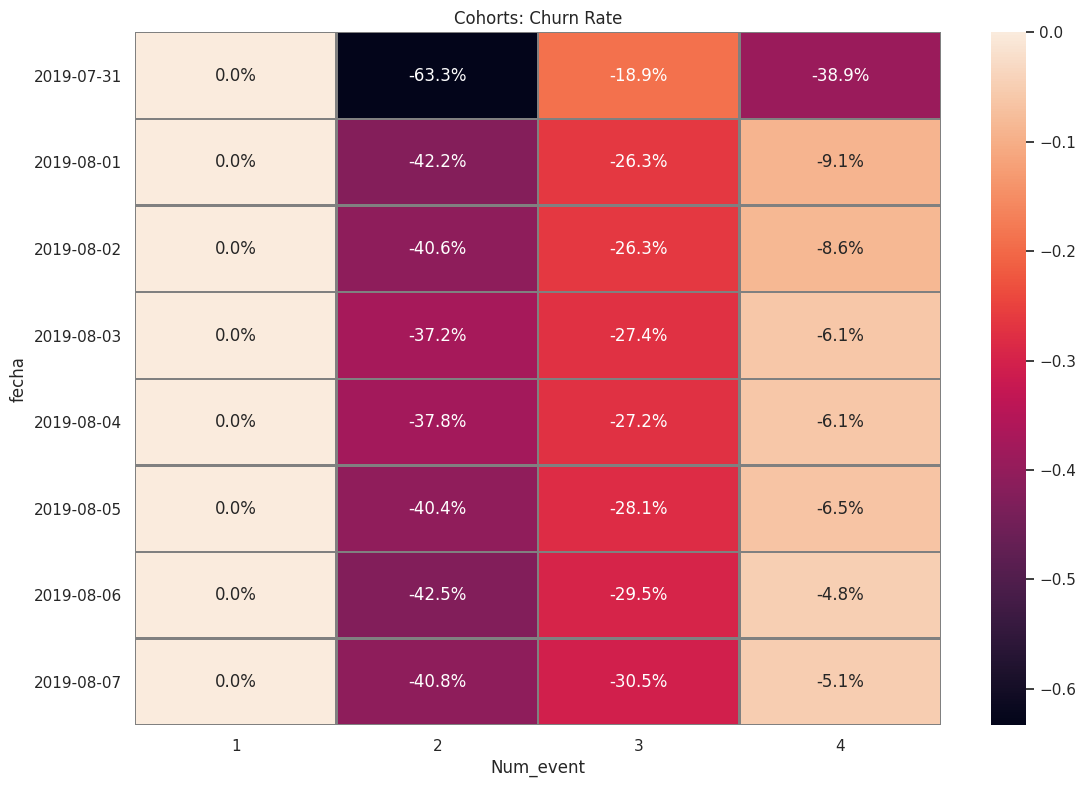

In [19]:

def cladifica_event(x):
    if x == 'MainScreenAppear':
        return 1
    elif x== 'OffersScreenAppear':
        return 2
    elif x=='CartScreenAppear':
        return 3
    elif x=='PaymentScreenSuccessful':
        return 4
    else:
        return 0

logs_filter['Num_event']=logs_filter['EventName'].apply(cladifica_event)
#print(logs_filter.head(10))

logs_filter_sin_T=logs_filter[logs_filter['Num_event']!=0]


cohorts = (
    logs_filter_sin_T.groupby(['fecha', 'Num_event','EventName'])
    .agg({'DeviceIDHash': 'nunique'})
    .reset_index()
)


# Cálculo del recuento inicial de usuarios para cada cohorte
initial_users_count = cohorts[cohorts['Num_event'] == 1][
    ['fecha', 'DeviceIDHash']
]
initial_users_count = initial_users_count.rename(
    columns={'DeviceIDHash': 'cohort_users'}
)

cohorts = cohorts.merge(initial_users_count, on='fecha')


cohorts['churn_rate'] = cohorts.groupby(['fecha'])['DeviceIDHash'].pct_change()

print(cohorts.head(4))
churn_pivot = cohorts.pivot_table(
    index='fecha',
    columns='Num_event',
    values='churn_rate',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

<P>Podemos observar que el evente que mas usuarios pierde es el 2 OffersScreenAppear esto exluyendo el evento 0 que es el turorial. Dado a que su comportamiento es que se puede omitir en las acciones de usuarios, se decidio excluir.</P>

In [20]:
step_0 = ~users['Tutorial'].isna()
step_1 = step_1 & (users['MainScreenAppear'] > users['Tutorial'])
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_Tutorial = users[step_0].shape[0]
n_MainScreenAppear = users[step_1].shape[0]
n_OffersScreenAppear = users[step_2].shape[0]
n_CartScreenAppear = users[step_3].shape[0]
n_PaymentScreenSuccessful = users[step_4].shape[0]

print('Visitantes que vieron el tutorial:', n_Tutorial)
print('Visitantes:', n_MainScreenAppear)
print('Observo las ofertas:', n_OffersScreenAppear)
print('Se agregó un producto al carrito:', n_CartScreenAppear)
print('Pagado:', n_PaymentScreenSuccessful)

Visitantes que vieron el tutorial: 845
,Visitantes: 793
,Observo las ofertas: 628
,Se agregó un producto al carrito: 352
,Pagado: 217


<P>Implica que solo 217 usuarios siguieron todos los paso en el order propuesto de eventos. que equivale al 0.029% del total de usuarios en el periodo establecido. </P>

<h2>Paso 5. Estudiar los resultados del experimento</h2>

*¿Cuántos usuarios hay en cada grupo? 

In [21]:
gruop_246=logs_filter[logs_filter['ExpId']==246]
gruop_247=logs_filter[logs_filter['ExpId']==247]
group_246_247=logs_filter[logs_filter['ExpId']!=248]
num_g246= gruop_246['DeviceIDHash'].count()
num_usu246_unicos=gruop_246.groupby('DeviceIDHash')['DeviceIDHash'].nunique().count()
num_g247= gruop_247['DeviceIDHash'].count()
num_usu247_unicos=gruop_247.groupby('DeviceIDHash')['DeviceIDHash'].nunique().count()
print("Numero usuarios G246:",num_g246)
print("Numero usuarios G246 unicos:",num_usu246_unicos)
print("Numero usuarios G247:",num_g247)
print("Numero usuarios G247 unicos:",num_usu247_unicos)

Numero usuarios G246: 80045
,Numero usuarios G246 unicos: 2485
,Numero usuarios G247: 77811
,Numero usuarios G247 unicos: 2517


* Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [22]:


visitors = (
    group_246_247.groupby(['fecha', 'ExpId'])
    .agg({'DeviceIDHash': 'nunique'})
    .reset_index()
)

visitors = visitors.rename(
columns={'DeviceIDHash': 'visitors'}
)

#print(visitors)



ordersByUsers246 = (
    group_246_247[group_246_247['ExpId'] == 246]
    .groupby('DeviceIDHash', as_index=False)
    .agg({'EventName': 'count'})
)


ordersByUsers246.columns = ['DeviceIDHash', 'events']




ordersByUsers247 = (
    group_246_247[group_246_247['ExpId'] == 247]
    .groupby('DeviceIDHash', as_index=False)
    .agg({'EventName': 'count'})
)
ordersByUsers247.columns = ['DeviceIDHash', 'events']



sampleA = pd.concat(
    [
        ordersByUsers246['events'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['ExpId'] == '246']['visitors'].sum()
                - len(ordersByUsers246['events'])
            ),
            name='events',
        ),
    ],
    axis=0,
)


sampleB = pd.concat(
    [
        ordersByUsers247['events'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['ExpId'] == '247']['visitors'].sum()
                - len(ordersByUsers247['events'])
            ),
            name='events',
        ),
    ],
    axis=0,
)



print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))


0.85786
,-0.040


<P>El valor p 0.85786, que es mayor que 0.05. Entonces, no podemos rechazar la hipótesis nula ya que no hay una diferencia estadísticamente significativa en la conversión entre los grupos. Pero la pérdida relativa del grupo B(247) es del 4.0%</P>

* Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [23]:

events_246 = gruop_246.groupby('EventName').agg({'DeviceIDHash': 'nunique'})
print("Numero de usuarios por evento de grupo 246:")
print(events_246.sort_values(by = 'DeviceIDHash', ascending=False))

print()

events_247 = gruop_247.groupby('EventName').agg({'DeviceIDHash': 'nunique'})
print("Numero de usuarios por evento de grupo 247:")
print(events_247.sort_values(by = 'DeviceIDHash', ascending=False))


Numero de usuarios por evento de grupo 246:
,                         DeviceIDHash
,EventName                            
,MainScreenAppear                 2452
,OffersScreenAppear               1544
,CartScreenAppear                 1267
,PaymentScreenSuccessful          1200
,Tutorial                          278
,
,Numero de usuarios por evento de grupo 247:
,                         DeviceIDHash
,EventName                            
,MainScreenAppear                 2479
,OffersScreenAppear               1526
,CartScreenAppear                 1239
,PaymentScreenSuccessful          1159
,Tutorial                          285


In [24]:
nom_events=logs_filter.groupby('EventName')['EventName'].nunique()
print(nom_events)


EventName
,CartScreenAppear           1
,MainScreenAppear           1
,OffersScreenAppear         1
,PaymentScreenSuccessful    1
,Tutorial                   1
,Name: EventName, dtype: int64


In [25]:
def calcula_diferencia(event,data,A,B):
    data=data[data['EventName']==event]
    dataA=data[data['ExpId']==A]
    dataB=data[data['ExpId']==B]
    dataAB=data[data['ExpId'].isin([A, B])]

    visitors = (
    dataAB.groupby(['fecha', 'ExpId'])
    .agg({'DeviceIDHash': 'nunique'})
    .reset_index()
    )
    
    visitors = visitors.rename(
    columns={'DeviceIDHash': 'visitors'}
    )
    
    ordersByUsersA = (
        dataAB[dataAB['ExpId'] == A]
        .groupby('DeviceIDHash', as_index=False)
        .agg({'EventName': 'count'})
    )
    ordersByUsersA.columns = ['DeviceIDHash', 'events']

    ordersByUsersB = (
    dataAB[dataAB['ExpId'] == B]
        .groupby('DeviceIDHash', as_index=False)
        .agg({'EventName': 'count'})
    )
    ordersByUsersB.columns = ['DeviceIDHash', 'events']


    sampleA = pd.concat(
        [
            ordersByUsersA['events'],
            pd.Series(
                0,
                index=np.arange(
                    visitors[visitors['ExpId'] == A]['visitors'].sum()
                    - len(ordersByUsersA['events'])
                ),
                name='events',
            ),
        ],
        axis=0,
    )
    sampleB = pd.concat(
        [
            ordersByUsersB['events'],
            pd.Series(
                0,
                index=np.arange(
                    visitors[visitors['ExpId'] == B]['visitors'].sum()
                    - len(ordersByUsersB['events'])
                ),
                name='events',
            ),
        ],
        axis=0,
    )

    pvaule='{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1])
    dif='{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)
    print("Evente :",event)
    print("valor p:",pvaule)
    print("diferencia significativa:",dif)
    print()


for event in nom_events.index:
    calcula_diferencia(event,logs_filter,246,247)



Evente : CartScreenAppear
,valor p: 0.65692
,diferencia significativa: -0.141
,
,Evente : MainScreenAppear
,valor p: 0.63080
,diferencia significativa: 0.012
,
,Evente : OffersScreenAppear
,valor p: 0.68337
,diferencia significativa: 0.029
,
,Evente : PaymentScreenSuccessful
,valor p: 0.54168
,diferencia significativa: -0.139
,
,Evente : Tutorial
,valor p: 0.96739
,diferencia significativa: 0.027
,


<P>Podemos observar que en todos los evenetos el valor P es mayor 0.05, No podriamos rechazar ni una hipotesis nula, La diferencia significativa en cada evento es diferente.</P>

1. Para CartScreenAppear (grupo 247) es ligeramente menor al (grupo 246) por 14.1%.
2. Para MainScreenAppear (grupo 246) es ligeramente mayor al (grupo 247) por 1.2 %.
3. Para OffersScreenAppear (grupo 246) es ligeramente mayor al (grupo 247) por 2.9 %.
4. Para PaymentScreenSuccessful (grupo 247) es ligeramente menor al (grupo 246) por 13.9%.
5. Para Tutorial (grupo 246) es ligeramente mayor al (grupo 247) por 2.7 %.

* Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [27]:
for event in nom_events.index:
    calcula_diferencia(event,df_logs,246,247)


Evente : CartScreenAppear
,valor p: 0.62962
,diferencia significativa: -0.141
,
,Evente : MainScreenAppear
,valor p: 0.70286
,diferencia significativa: 0.014
,
,Evente : OffersScreenAppear
,valor p: 0.63894
,diferencia significativa: 0.026
,
,Evente : PaymentScreenSuccessful
,valor p: 0.51557
,diferencia significativa: -0.139
,
,Evente : Tutorial
,valor p: 0.87705
,diferencia significativa: 0.029
,


<P>Al utilizar todos los datos del periodo inicial los valores P cambiaron ligeramnete, pero aun siguen siendo mayores a 0.05. </P>
<P>De la misma manera la diferencia significati cambio ligeramente en algunos casos.</P>

<P>En conclusion la exclusion del periodo no  represento un gran cabio significativamente, esto quiere decir que a lo largo del la prueba la distribucion de los grupos se mantuvo equilibradamente. si hubo cambios estos fueron minimos y no exponenciales.</P>

* ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

<P> El nivel de significancia que se establecio fue 0.05, en este caso 1 de cada 20 hipotesis podria ser falsa, incluso si el valor de significancia fue de 0.1 la mayoria de los caso se cumpliria, para este caso ocupar el estandar 0.05 esta bien.</P>

<h2>Conclusiones.</h2>
<P>El proyecto fue muy interesante de realizar se pudo aplicar varios de los conocimientos adquiridos en el curso, esto no extenta que en algunos punto fue interesante planificar y el como resolver algunos punto, como el calcular la diferencia estadistica entre las muestras.</P>